In [5]:
!pip install matplotlib seaborn wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------  297.0/300.2 kB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 6.2 MB/s eta 0:00:00


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

### data

In [2]:
df = pd.read_csv('../Resume/Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [3]:
df = df.rename(columns={"Resume_str": "Resume"}, errors="raise")
df = df.drop(columns=['Resume_html', 'ID'])
df.head()

,Resume,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resume    2484 non-null   object
 1   Category  2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


C:\Users\carlos.anton\AppData\Local\Temp\ipykernel_26016\3007165898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Category" , palette="Set3", data=df, order = df['Category'].value_counts().index);


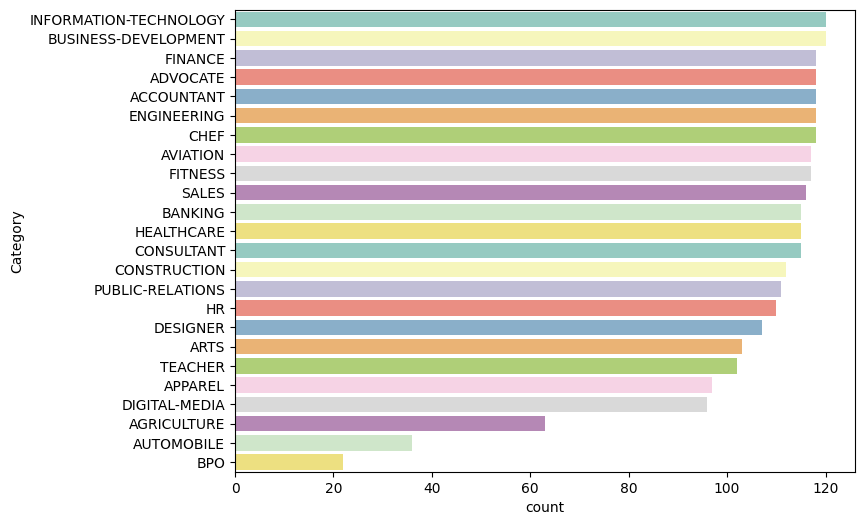

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(y="Category" , palette="Set3", data=df, order = df['Category'].value_counts().index);

### text cleaning

In [6]:
df["Resume"][1]

"         HR SPECIALIST, US HR OPERATIONS       Summary     Versatile  media professional with background in Communications, Marketing, Human Resources and Technology.\xa0        Experience     09/2015   to   Current     HR Specialist, US HR Operations    Company Name   －   City  ,   State       Managed communication regarding launch of Operations group, policy changes and system outages      Designed standard work and job aids to create comprehensive training program for new employees and contractors         Audited job postings for old, pending, on-hold and draft positions.           Audited union hourly, non-union hourly and salary background checks and drug screens             Conducted monthly new hire benefits briefing to new employees across all business units               Served as a link between HR Managers and vendors by handling questions and resolving system-related issues         Provide real-time process improvement feedback on key metrics and initiatives  Successfully r

In [7]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # borra simbols de puntuación
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) # borra caracteres non-ascii
    resumeText = re.sub('\s+', ' ', resumeText)  # borra espacios blanco extras
    resumeText = re.sub(r'[0-9]+', '', resumeText)  # borra números
    return resumeText.lower()
    

In [8]:
df["Cleaned Resume"] = df["Resume"].apply(lambda x: cleanResume(x))
len(df["Cleaned Resume"][1])

4984

In [9]:
df.head(5)

,Resume,Category,Cleaned Resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admin...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versat...
2,HR DIRECTOR Summary Over 2...,HR,hr director summary over years experience in...
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dy...
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depa...


In [10]:
df["Cleaned Resume"][1]

' hr specialist us hr operations summary versatile media professional with background in communications marketing human resources and technology experience   to current hr specialist us hr operations company name city state managed communication regarding launch of operations group policy changes and system outages designed standard work and job aids to create comprehensive training program for new employees and contractors audited job postings for old pending on hold and draft positions audited union hourly non union hourly and salary background checks and drug screens conducted monthly new hire benefits briefing to new employees across all business units served as a link between hr managers and vendors by handling questions and resolving system related issues provide real time process improvement feedback on key metrics and initiatives successfully re branded us hr operations sharepoint site business unit project manager for rfi rfp on background check and drug screen vendor   to   i

### Word clouds

In [11]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk import word_tokenize

len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carlos.anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [12]:
ds_df = df[df.Category == 'HR']
resumes=""
total_words = []
for resume in ds_df["Cleaned Resume"]:
    resumes += resume
    words = word_tokenize(resume)
    for word in words :
        if word not in set(stopwords.words('english')) and word not in string.punctuation:
            total_words.append(word)

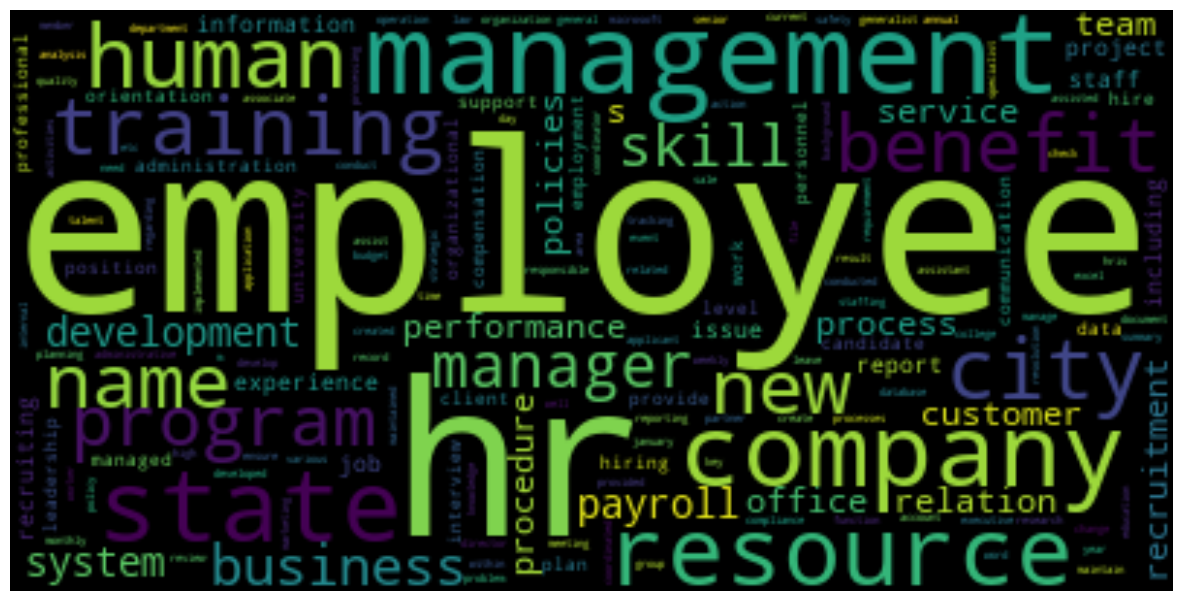

In [13]:
wordcloudimage = WordCloud( font_step=2 ,
                            max_font_size=500,
                            collocations = False,
                            #collocation_threshold = 1 
                          ).generate(resumes)

plt.figure(figsize=(15,15))
plt.imshow(wordcloudimage, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
freq_word = nltk.FreqDist(total_words)
freq_word.most_common(10)

[('hr', 1057),
 ('management', 950),
 ('employee', 828),
 ('company', 756),
 ('state', 666),
 ('human', 599),
 ('city', 568),
 ('training', 502),
 ('employees', 500),
 ('new', 457)]

### Codificación - Label Encoding

In [11]:
encoder = LabelEncoder()
df['Labels']=encoder.fit_transform(df.Category)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Resume          2484 non-null   object
 1   Category        2484 non-null   object
 2   Cleaned Resume  2484 non-null   object
 3   Labels          2484 non-null   int32 
dtypes: int32(1), object(3)
memory usage: 68.1+ KB


In [13]:
df.Labels.value_counts()[:5]

Labels
20    120
9     120
16    118
1     118
0     118
Name: count, dtype: int64

In [14]:
df.head(5)

,Resume,Category,Cleaned Resume,Labels
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admin...,19
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versat...,19
2,HR DIRECTOR Summary Over 2...,HR,hr director summary over years experience in...,19
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dy...,19
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depa...,19


In [32]:
from sklearn.model_selection import train_test_split

text = df["Cleaned Resume"].values
labels = df["Labels"].values

text_train,text_test,y_train,y_test = train_test_split(text, labels, random_state=0, test_size=0.2, stratify=df.Labels)
print(text_train.shape)
print(y_train.shape)
print(text_test.shape)
print(y_test.shape)

(1987,)
(1987,)
(497,)
(497,)


### Vectorización TF-IDF

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    use_idf = True,
    stop_words='english',
    max_features=1000)

In [34]:
X_train = word_vectorizer.fit_transform(text_train)
X_train.shape

(1987, 1000)

In [35]:
X_test = word_vectorizer.transform(text_test)
X_test.shape

(497, 1000)

In [36]:
import itertools
dict(itertools.islice(word_vectorizer.vocabulary_.items(), 10))

{'consultant': 195,
 'profile': 712,
 'highly': 418,
 'skilled': 848,
 'consulting': 196,
 'manager': 538,
 'understanding': 950,
 'software': 853,
 'development': 269,
 'life': 515}

### Vectorización Word2Vec

In [45]:
%pip install gensim

  Using cached gensim-4.3.2-cp311-cp311-win_amd64.whl.metadata (8.5 kB)
Using cached gensim-4.3.2-cp311-cp311-win_amd64.whl (24.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [37]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np


# Tokenizar los documentos
text_train_tokens = [word_tokenize(doc) for doc in text_train]
text_test_tokens = [word_tokenize(doc) for doc in text_test]

# Crear y entrenar el modelo Word2Vec
# size es el número de dimensiones de los vectores de palabras, window es el tamaño máximo de la ventana contextual,
# min_count es la frecuencia mínima de palabras a considerar, workers es el número de hilos para entrenar el modelo
word2vec_model = Word2Vec(sentences=text_train_tokens, vector_size=100, window=5, min_count=2, workers=4)

# Función para convertir un texto en un vector promedio de todas sus palabras
def document_vector(word2vec_model, doc_tokens):
    # Eliminar las palabras que no están en el vocabulario del modelo o son stopwords
    words = [word for word in doc_tokens if word in word2vec_model.wv.key_to_index]
    if len(words) == 0:
        return np.zeros(word2vec_model.vector_size)
    else:
        # Promediar los vectores de las palabras en el documento
        return np.mean(word2vec_model.wv[words], axis=0)

# Vectorizar los conjuntos de entrenamiento y prueba
X_train_w2v = np.array([document_vector(word2vec_model, doc) for doc in text_train_tokens])
X_test_w2v = np.array([document_vector(word2vec_model, doc) for doc in text_test_tokens])

# Mostrar las dimensiones de los conjuntos vectorizados
print(X_train_w2v.shape)
print(X_test_w2v.shape)

# Ejemplo: Ver los primeros 10 elementos del vocabulario
list(word2vec_model.wv.index_to_key)[:10]

(1987, 100)
(497, 100)


['and', 'to', 'of', 'the', 'in', 'for', 'with', 'a', 'state', 'company']

### Entrenamiento de modelos con Word2Vec

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def train_models(X_train_w2v, y_train):
    models = {
        "KNeighborsClassifier": KNeighborsClassifier(),
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "LinearSVC": LinearSVC(),
        "RandomForestClassifier": RandomForestClassifier()
    }
    for name, model in models.items():
        model.fit(X_train_w2v, y_train)
        models[name] = model
    return models

# Entrenar los modelos con el conjunto de entrenamiento vectorizado por Word2Vec
models_w2v = train_models(X_train_w2v, y_train)

# Evaluación
def evaluate_models(models_w2v, X_train_w2v, X_test_w2v, y_train, y_test):
    for name, model in models_w2v.items():
        # Evaluación en el conjunto de entrenamiento
        predictions_train = model.predict(X_train_w2v)
        accuracy_train = accuracy_score(y_train, predictions_train)
        
        # Evaluación en el conjunto de prueba
        predictions_test = model.predict(X_test_w2v)
        accuracy_test = accuracy_score(y_test, predictions_test)
        
        # Mostrar los resultados
        print(f"Modelo: {name}\n")
        print(f"  Accuracy en entrenamiento: {accuracy_train:.4f}")
        print(f"  Accuracy en prueba: {accuracy_test:.4f}\n")
        print("--------------------------------------------------\n")

# Evaluar los modelos entrenados en ambos conjuntos
evaluate_models(models_w2v, X_train_w2v, X_test_w2v, y_train, y_test)


c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Modelo: KNeighborsClassifier

  Precisión en entrenamiento: 0.5737
  Precisión en prueba: 0.4205

--------------------------------------------------

Modelo: LogisticRegression

  Precisión en entrenamiento: 0.5773
  Precisión en prueba: 0.5473

--------------------------------------------------

Modelo: LinearSVC

  Precisión en entrenamiento: 0.6336
  Precisión en prueba: 0.5714

--------------------------------------------------

Modelo: RandomForestClassifier

  Precisión en entrenamiento: 1.0000
  Precisión en prueba: 0.4950

--------------------------------------------------



Modelo: KNeighborsClassifier

  Accuracy en prueba: 0.4205

Reporte de Clasificación por Categoría:
              precision    recall  f1-score   support

           0       0.56      0.83      0.67        24
           1       0.20      0.50      0.28        24
           2       0.13      0.23      0.17        13
           3       0.22      0.37      0.27        19
           4       0.12      0.14      0.13        21
           5       0.00      0.00      0.00         7
           6       0.43      0.50      0.46        24
           7       0.32      0.26      0.29        23
           8       0.00      0.00      0.00         4
           9       0.41      0.58      0.48        24
          10       0.80      0.50      0.62        24
          11       0.67      0.64      0.65        22
          12       0.17      0.13      0.15        23
          13       0.57      0.38      0.46        21
          14       0.56      0.47      0.51        19
          15       0.60      0.62  

c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 

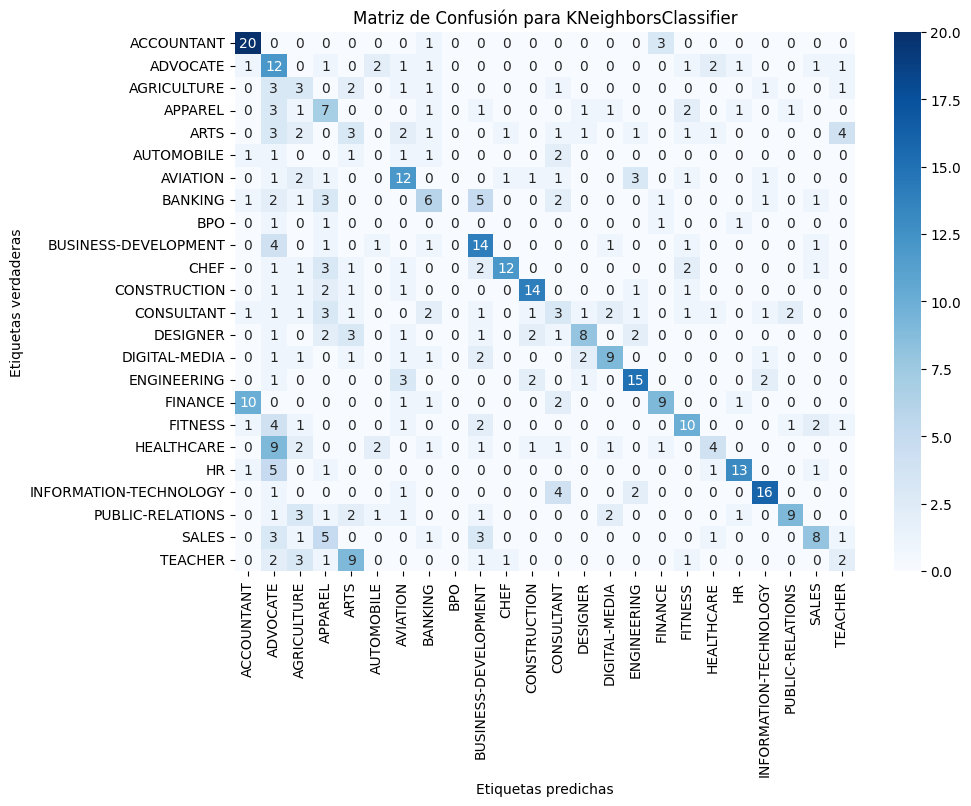

--------------------------------------------------

Modelo: LogisticRegression

  Accuracy en prueba: 0.5473

Reporte de Clasificación por Categoría:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.23      0.29      0.25        24
           2       0.43      0.23      0.30        13
           3       0.56      0.26      0.36        19
           4       0.33      0.24      0.28        21
           5       0.00      0.00      0.00         7
           6       0.55      0.71      0.62        24
           7       0.40      0.35      0.37        23
           8       0.00      0.00      0.00         4
           9       0.47      0.62      0.54        24
          10       0.68      0.54      0.60        24
          11       0.85      0.77      0.81        22
          12       0.21      0.13      0.16        23
          13       0.64      0.67      0.65        21
          14       0.65      0.58      

c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 

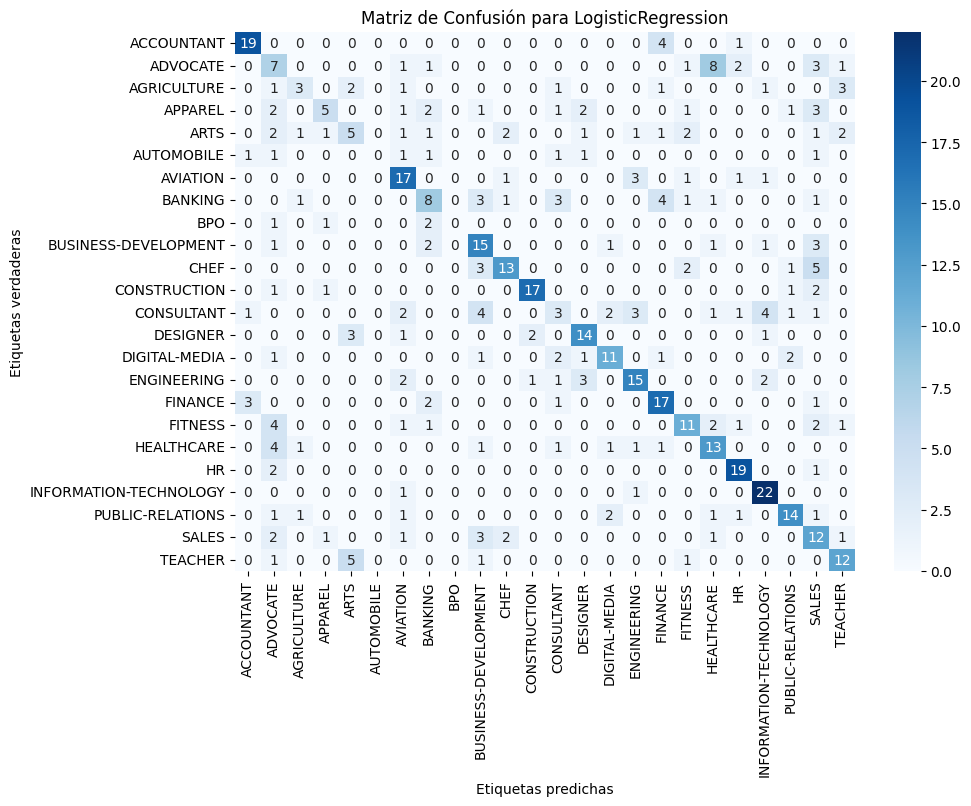

--------------------------------------------------

Modelo: LinearSVC

  Accuracy en prueba: 0.5714

Reporte de Clasificación por Categoría:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        24
           1       0.29      0.25      0.27        24
           2       0.80      0.31      0.44        13
           3       0.62      0.42      0.50        19
           4       0.50      0.19      0.28        21
           5       0.00      0.00      0.00         7
           6       0.50      0.62      0.56        24
           7       0.52      0.61      0.56        23
           8       0.00      0.00      0.00         4
           9       0.48      0.54      0.51        24
          10       0.60      0.62      0.61        24
          11       0.84      0.73      0.78        22
          12       0.33      0.09      0.14        23
          13       0.58      0.71      0.64        21
          14       0.62      0.53      0.57     

c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 

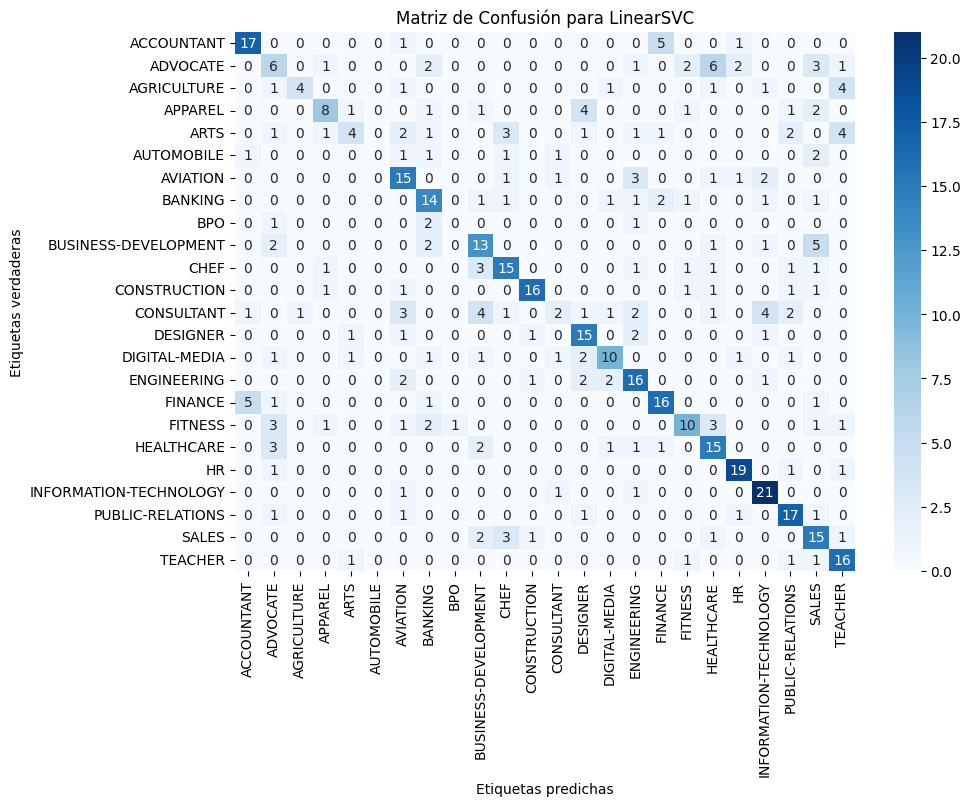

--------------------------------------------------

Modelo: RandomForestClassifier

  Accuracy en prueba: 0.4950

Reporte de Clasificación por Categoría:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.20      0.29      0.24        24
           2       0.17      0.08      0.11        13
           3       0.43      0.16      0.23        19
           4       0.20      0.14      0.17        21
           5       0.00      0.00      0.00         7
           6       0.36      0.67      0.47        24
           7       0.57      0.57      0.57        23
           8       0.00      0.00      0.00         4
           9       0.42      0.58      0.49        24
          10       0.78      0.58      0.67        24
          11       0.70      0.64      0.67        22
          12       0.17      0.09      0.11        23
          13       0.58      0.67      0.62        21
          14       0.50      0.42  

c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 

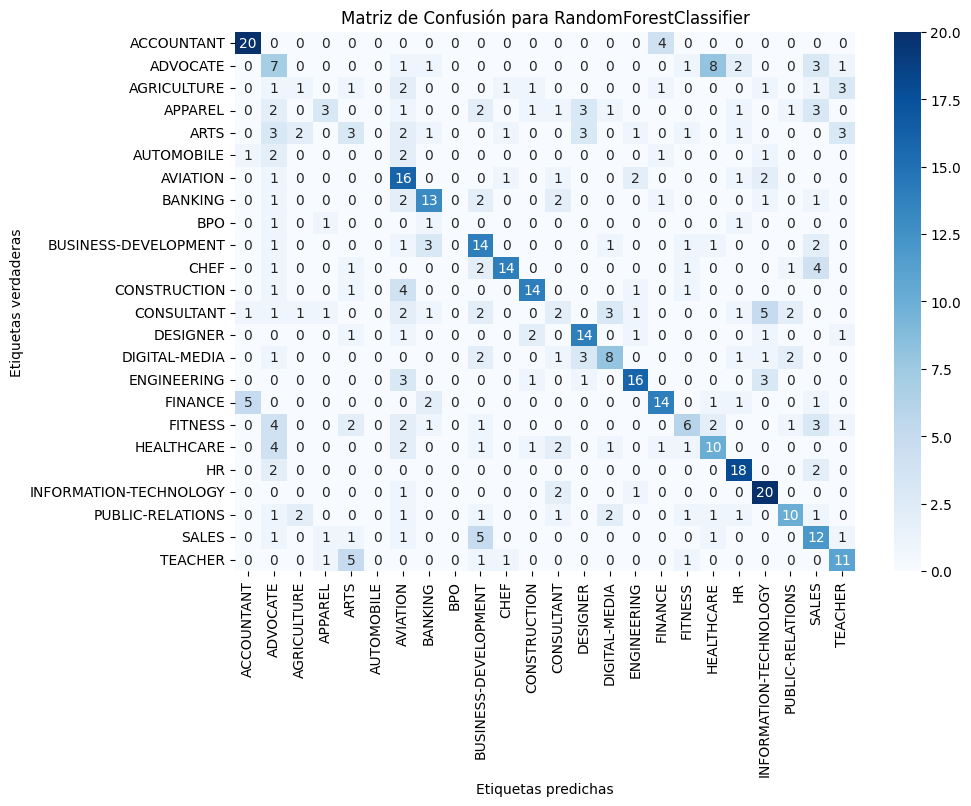

--------------------------------------------------



In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_models_detailed(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        # Predicciones en el conjunto de prueba
        predictions_test = model.predict(X_test)
        
        # Mostrar los resultados de precisión general
        print(f"Modelo: {name}\n")
        accuracy_test = accuracy_score(y_test, predictions_test)
        print(f"  Accuracy en prueba: {accuracy_test:.4f}\n")
        
        # Mostrar el reporte de clasificación por categoría
        print("Reporte de Clasificación por Categoría:")
        print(classification_report(y_test, predictions_test))
        
        # Mostrar la matriz de confusión
        cm = confusion_matrix(y_test, predictions_test)
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
        plt.title(f"Matriz de Confusión para {name}")
        plt.ylabel('Etiquetas verdaderas')
        plt.xlabel('Etiquetas predichas')
        plt.show()

        print("--------------------------------------------------\n")

# Evaluar los modelos entrenados con detalles por categoría
evaluate_models_detailed(models_w2v, X_train_w2v, X_test_w2v, y_train, y_test)

### Entrenamiento de modelos con TF-IDF

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

def train_models(X_train, y_train):
    models = {
        "MultinomialNB": MultinomialNB(),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "LogisticRegression": LogisticRegression(),
        "LinearSVC": LinearSVC(),
        "RandomForestClassifier": RandomForestClassifier()
    }
    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model
    return models

models_tf = train_models(X_train, y_train)

c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


### Evaluación con TF-IDF

In [39]:
from sklearn.metrics import accuracy_score

def evaluate_models(models_tf, X_train, y_train, X_test, y_test):
    for name, model in models_tf.items():
        # Evaluación en el conjunto de entrenamiento
        predictions_train = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, predictions_train)
        
        # Evaluación en el conjunto de prueba
        predictions_test = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, predictions_test)
        
        # Mostrar los resultados de precisión
        print(f"Modelo: {name}\n")
        print(f"  Accuracy en entrenamiento: {train_accuracy:.4f}")
        print(f"  Accuracy en prueba: {test_accuracy:.4f}\n")
        print("--------------------------------------------------\n")

    # Recopilación de precisiones para determinar el mejor modelo
    train_accuracy_scores = {name: accuracy_score(y_train, model.predict(X_train)) for name, model in models_tf.items()}
    test_accuracy_scores = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in models_tf.items()}

    # Determinar el mejor modelo basado en la precisión en el conjunto de prueba
    best_model_name_test = max(test_accuracy_scores, key=test_accuracy_scores.get)
    best_model_test = models_tf[best_model_name_test]
    print(f"Mejor Modelo (Prueba): {best_model_name_test} con precisión {test_accuracy_scores[best_model_name_test]:.4f}")

    # Determinar el mejor modelo basado en la precisión en el conjunto de entrenamiento
    best_model_name_train = max(train_accuracy_scores, key=train_accuracy_scores.get)
    best_model_train = models_tf[best_model_name_train]
    print(f"Mejor Modelo (Entrenamiento): {best_model_name_train} con precisión {train_accuracy_scores[best_model_name_train]:.4f}")

    return best_model_test, best_model_name_test, best_model_train, best_model_name_train

best_model_test, best_model_name_test, best_model_train, best_model_name_train = evaluate_models(models_tf, X_train, y_train, X_test, y_test)


Modelo: MultinomialNB

  Accuracy en entrenamiento: 0.6412
  Accuracy en prueba: 0.5795

--------------------------------------------------

Modelo: KNeighborsClassifier

  Accuracy en entrenamiento: 0.6704
  Accuracy en prueba: 0.5191

--------------------------------------------------

Modelo: LogisticRegression

  Accuracy en entrenamiento: 0.7962
  Accuracy en prueba: 0.6761

--------------------------------------------------

Modelo: LinearSVC

  Accuracy en entrenamiento: 0.9950
  Accuracy en prueba: 0.7103

--------------------------------------------------

Modelo: RandomForestClassifier

  Accuracy en entrenamiento: 1.0000
  Accuracy en prueba: 0.7183

--------------------------------------------------

Mejor Modelo (Prueba): RandomForestClassifier con precisión 0.7183
Mejor Modelo (Entrenamiento): RandomForestClassifier con precisión 1.0000


Modelo: MultinomialNB

  Accuracy en Test: 0.5795

Reporte de Clasificación por Categoría:
              precision    recall  f1-score   support

           0       0.67      0.92      0.77        24
           1       0.45      0.38      0.41        24
           2       0.00      0.00      0.00        13
           3       0.67      0.21      0.32        19
           4       0.33      0.05      0.08        21
           5       0.00      0.00      0.00         7
           6       0.61      0.71      0.65        24
           7       0.62      0.57      0.59        23
           8       0.00      0.00      0.00         4
           9       0.39      0.58      0.47        24
          10       0.68      0.62      0.65        24
          11       0.71      0.68      0.70        22
          12       0.33      0.04      0.08        23
          13       0.78      0.67      0.72        21
          14       0.72      0.68      0.70        19
          15       0.64      0.75      0.69 

c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 

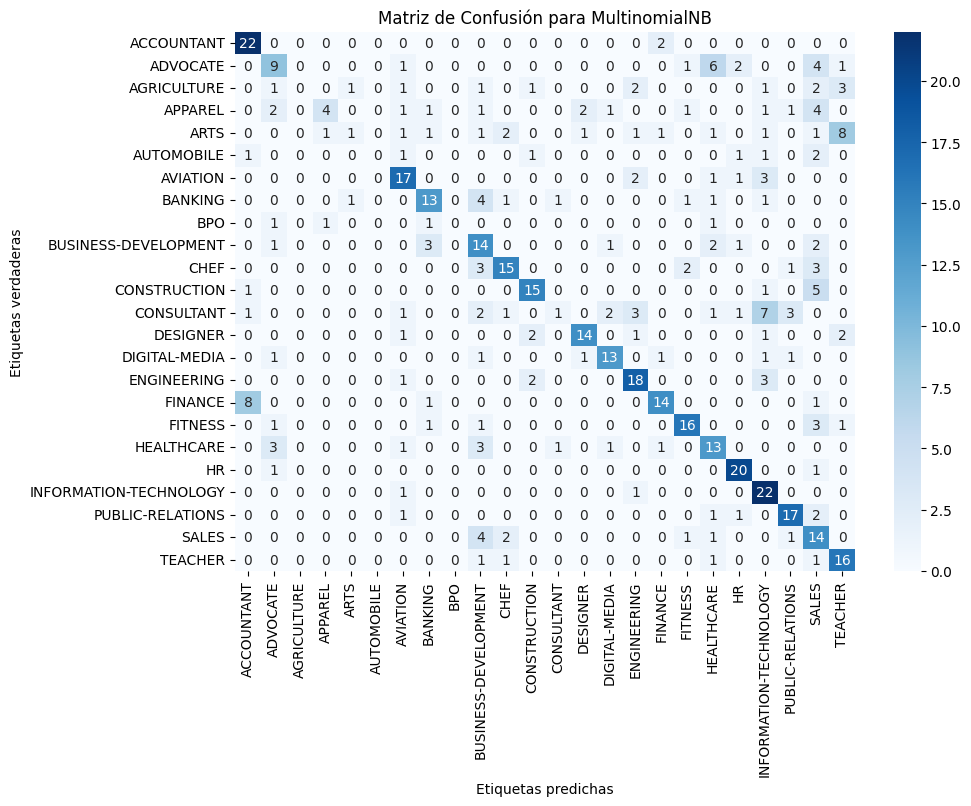

--------------------------------------------------

Modelo: KNeighborsClassifier

  Accuracy en Test: 0.5191

Reporte de Clasificación por Categoría:
              precision    recall  f1-score   support

           0       0.48      0.96      0.64        24
           1       0.30      0.42      0.35        24
           2       0.43      0.23      0.30        13
           3       0.29      0.26      0.28        19
           4       0.26      0.33      0.29        21
           5       0.00      0.00      0.00         7
           6       0.59      0.71      0.64        24
           7       0.55      0.52      0.53        23
           8       0.00      0.00      0.00         4
           9       0.26      0.58      0.36        24
          10       0.82      0.58      0.68        24
          11       0.58      0.68      0.62        22
          12       0.27      0.13      0.18        23
          13       0.71      0.48      0.57        21
          14       0.76      0.68      

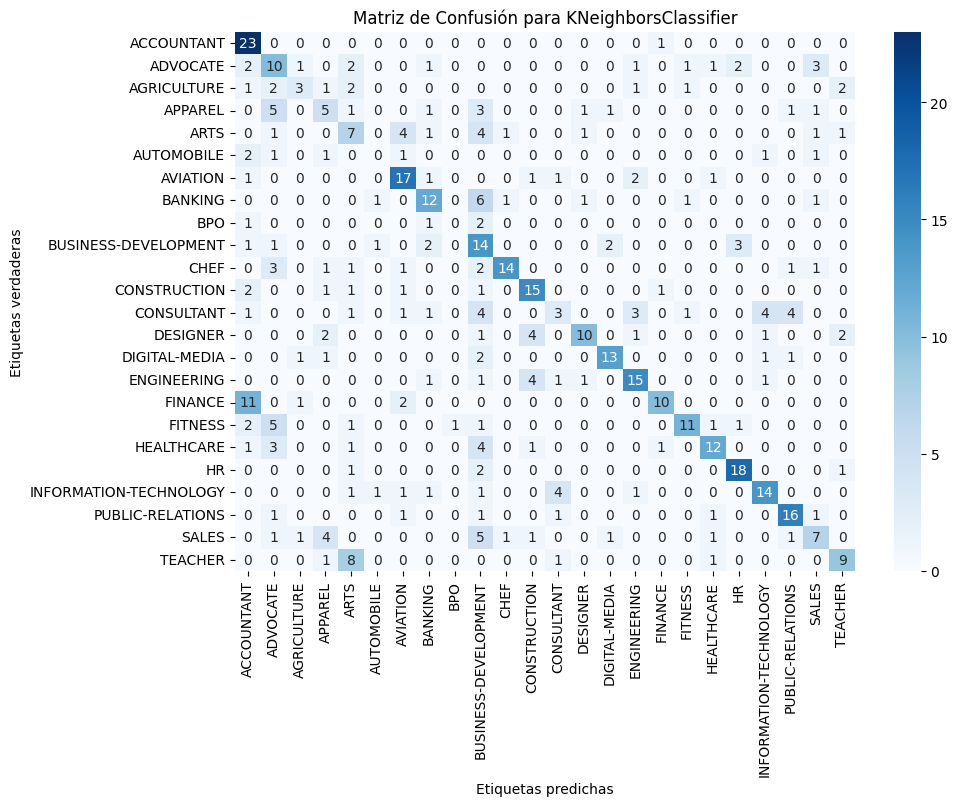

--------------------------------------------------

Modelo: LogisticRegression

  Accuracy en Test: 0.6761

Reporte de Clasificación por Categoría:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.56      0.58      0.57        24
           2       1.00      0.15      0.27        13
           3       0.62      0.26      0.37        19
           4       0.67      0.29      0.40        21
           5       0.00      0.00      0.00         7
           6       0.75      0.75      0.75        24
           7       0.57      0.70      0.63        23
           8       0.00      0.00      0.00         4
           9       0.48      0.62      0.55        24
          10       0.90      0.75      0.82        24
          11       0.86      0.82      0.84        22
          12       0.54      0.30      0.39        23
          13       0.80      0.76      0.78        21
          14       0.72      0.68      0.

c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 

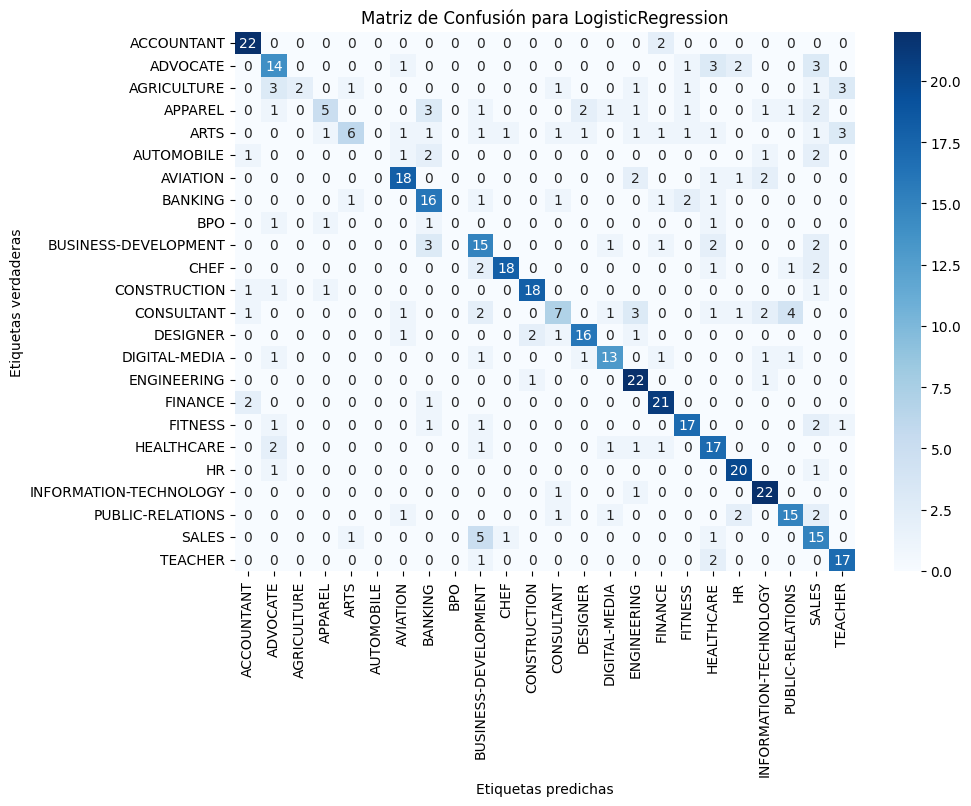

--------------------------------------------------

Modelo: LinearSVC

  Accuracy en Test: 0.7103

Reporte de Clasificación por Categoría:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        24
           1       0.68      0.79      0.73        24
           2       0.60      0.23      0.33        13
           3       0.55      0.32      0.40        19
           4       0.73      0.38      0.50        21
           5       0.00      0.00      0.00         7
           6       0.83      0.83      0.83        24
           7       0.59      0.74      0.65        23
           8       0.00      0.00      0.00         4
           9       0.60      0.50      0.55        24
          10       0.87      0.83      0.85        24
          11       0.95      0.82      0.88        22
          12       0.44      0.30      0.36        23
          13       0.80      0.95      0.87        21
          14       0.64      0.74      0.68       

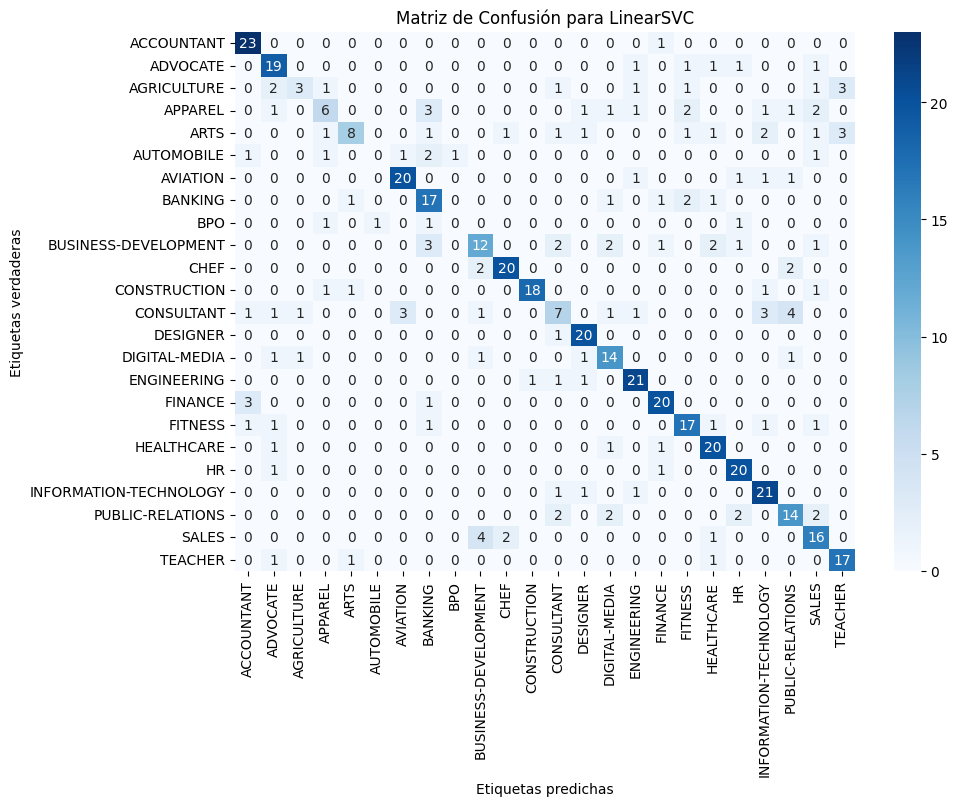

--------------------------------------------------

Modelo: RandomForestClassifier

  Accuracy en Test: 0.7183

Reporte de Clasificación por Categoría:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        24
           1       0.65      0.71      0.68        24
           2       1.00      0.15      0.27        13
           3       0.43      0.16      0.23        19
           4       0.64      0.33      0.44        21
           5       0.00      0.00      0.00         7
           6       0.88      0.92      0.90        24
           7       0.63      0.74      0.68        23
           8       0.00      0.00      0.00         4
           9       0.58      0.46      0.51        24
          10       0.88      0.92      0.90        24
          11       0.86      0.86      0.86        22
          12       0.74      0.61      0.67        23
          13       0.70      0.90      0.79        21
          14       0.58      0.74    

c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 

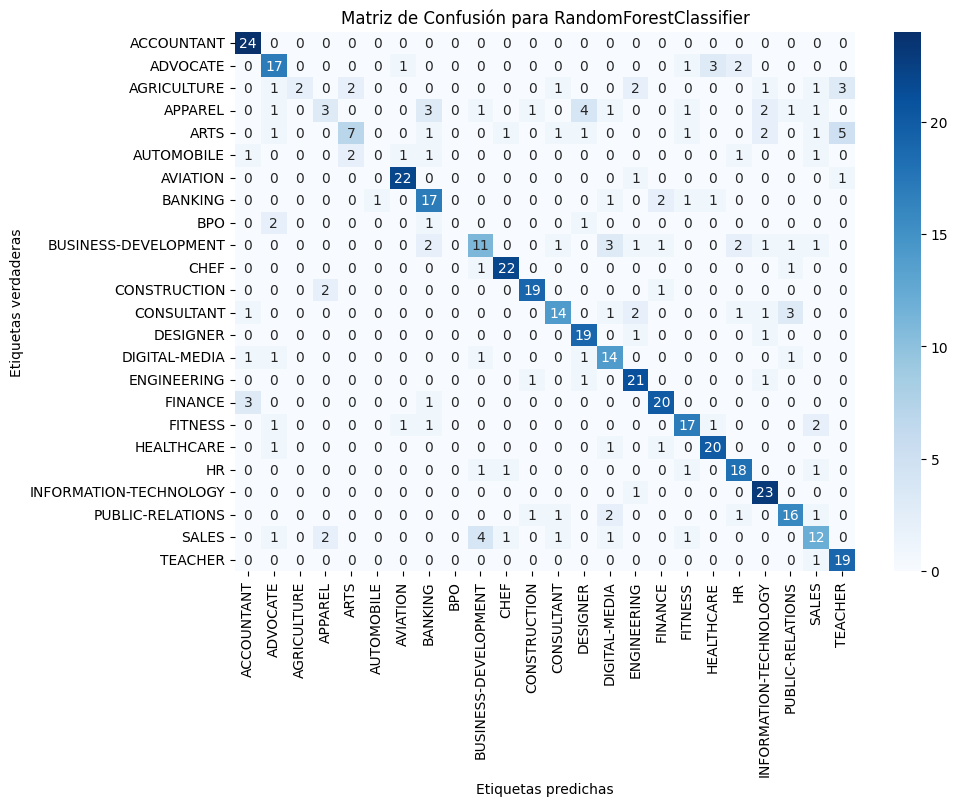

--------------------------------------------------



In [40]:
def evaluate_models_detailed_tf_idf(models_tf, X_train, y_train, X_test, y_test):
    for name, model in models_tf.items():
        # Predicciones en el conjunto de prueba
        predictions_test = model.predict(X_test)
        
        # Mostrar los resultados de precisión general
        print(f"Modelo: {name}\n")
        accuracy_test = accuracy_score(y_test, predictions_test)
        print(f"  Accuracy en Test: {accuracy_test:.4f}\n")
        
        # Mostrar el reporte de clasificación por categoría
        print("Reporte de Clasificación por Categoría:")
        print(classification_report(y_test, predictions_test))
        
        # Mostrar la matriz de confusión
        cm = confusion_matrix(y_test, predictions_test)
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
        plt.title(f"Matriz de Confusión para {name}")
        plt.ylabel('Etiquetas verdaderas')
        plt.xlabel('Etiquetas predichas')
        plt.show()

        print("--------------------------------------------------\n")

# Llama a esta función pasando tus modelos TF-IDF y datos
evaluate_models_detailed_tf_idf(models_tf, X_train, y_train, X_test, y_test)


### Ajuste de hiperparámetros para LinearSVC

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Definir los hiperparámetros a ajustar
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parámetro de regularización
    'max_iter': [1000, 2000, 3000],  # Número máximo de iteraciones
}

# Crear el modelo LinearSVC
model = LinearSVC(dual=True)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Imprimir los mejores hiperparámetros y la precisión asociada
print("Best Parameters:", best_params)
print("Best Accuracy:", grid_search.best_score_)

c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\carlos.anton\OneDrive - Grupo VASS\Carlos\Desarrollo_personal\CVInsights-Project\venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters: {'C': 1, 'max_iter': 1000}
Best Accuracy: 0.6784210726174955


### Ajuste de hiperparámetros para Random Forest

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [80, 100, 120, 150],  # Número de árboles en el bosque
    'max_depth': [None, 1, 2],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 3, 4, 5],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 3]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Crear el modelo RandomForestClassifier
model = RandomForestClassifier()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Imprimir los mejores hiperparámetros
print("Best Parameters:", best_params)

# Predecir en el conjunto de entrenamiento
train_predictions = best_model.predict(X_train)

# Calcular y imprimir la precisión en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train Accuracy:", train_accuracy)

# Predecir en el conjunto de prueba
test_predictions = best_model.predict(X_test)

# Calcular y imprimir la precisión en el conjunto de prueba
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Train Accuracy: 0.995973829894313
Test Accuracy: 0.7243460764587525


### Guardamos el mejor modelo con Pickle

In [59]:
import pickle

# Guarda el mejor modelo
model_file_pickle = f"{best_model_name}_best_model.pkl"
with open(model_file_pickle, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved as {model_file_pickle}")

Model saved as RandomForestClassifier_best_model.pkl


### Guardamos word_vectorizer y encoder

In [39]:
import joblib

joblib.dump(word_vectorizer, 'word_vectorizer.joblib')
joblib.dump(encoder, 'encoder.joblib')

['encoder.joblib']